## *Importing the libraries*





In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

## **Loading the Dataset**

In [144]:
car_data = pd.read_csv("car_price_data1.csv")

In [145]:
car_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991,320
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003,S 500
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007,Q7
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011,Rav 4


# Peprocessing

### `Exploring the descriptive statistics of the variables`

In [146]:
car_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.00,4345,4345.00,4195.00,4345,4345,4345.00,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.75,NaN,161.24,2.79,NaN,NaN,2006.55,NaN
std,NaN,25584.24,NaN,105.71,5.07,NaN,NaN,6.72,NaN
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00,NaN
25%,NaN,6999.00,NaN,86.00,1.80,NaN,NaN,2003.00,NaN
50%,NaN,11500.00,NaN,155.00,2.20,NaN,NaN,2008.00,NaN
75%,NaN,21700.00,NaN,230.00,3.00,NaN,NaN,2012.00,NaN


In [147]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


# Check for any missing values and treat it

In [148]:
df=car_data
df.isna().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [149]:
df_no_mv = df.dropna()

In [150]:
df_no_mv.isna().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
Model           0
dtype: int64

## **Data Exploration and Analysis**

The probability distribution will show us how that variable is distributed

Price

<ipython-input-151-d72e9ec5435c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  dn = sns.distplot(df_no_mv['Price'] , color='blue')


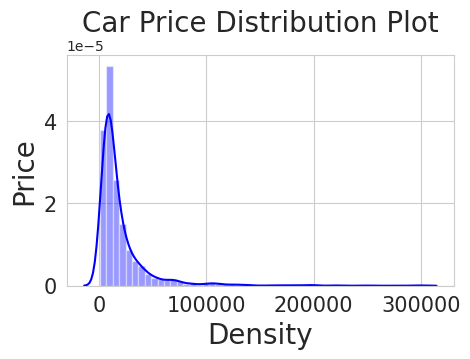

In [151]:
# This makes it very easy to spot anomalies, such as outliers
plt.figure(figsize=[5,3])
dn = sns.distplot(df_no_mv['Price'] , color='blue')
# plt.title('Car Price Distribution Plot')
dn.axes.set_title('Car Price Distribution Plot',fontsize=20)
dn.set_xlabel("Density",fontsize=20)
dn.set_ylabel("Price",fontsize=20)
dn.tick_params(labelsize=15)

Box plot show the median, upper and lower quartiles, minimum and maximum values, and any outliers in the dataset.

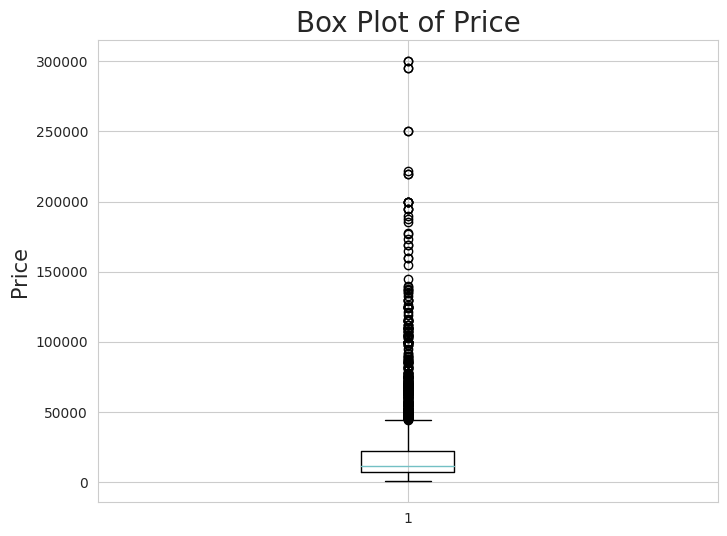

In [152]:
plt.figure(figsize=(8, 6))
plt.boxplot(df_no_mv['Price'])
plt.title('Box Plot of Price', fontsize=20)
plt.ylabel('Price',fontsize=15)
plt.show()

Dealing with outliers


In [153]:
# variable q that will be equal to the 99th percentile of the 'Price' variable
q = df_no_mv['Price'].quantile(0.99)

df_no_mv = df_no_mv[df_no_mv['Price']<q]

<ipython-input-154-0b95730af41b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  dn1 = sns.distplot(df_no_mv['Price'] , color='blue')


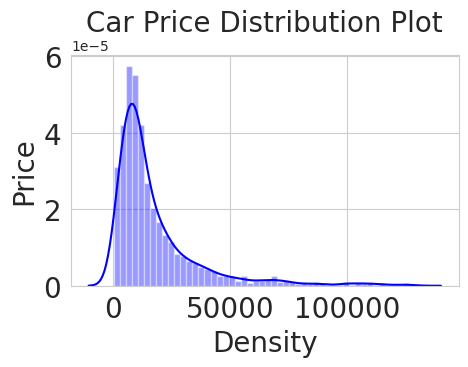

In [154]:
plt.figure(figsize=[5,3])
dn1 = sns.distplot(df_no_mv['Price'] , color='blue')
dn1.axes.set_title('Car Price Distribution Plot',fontsize=20)
dn1.set_xlabel("Density",fontsize=20)
dn1.set_ylabel("Price",fontsize=20)
dn1.tick_params(labelsize=20)

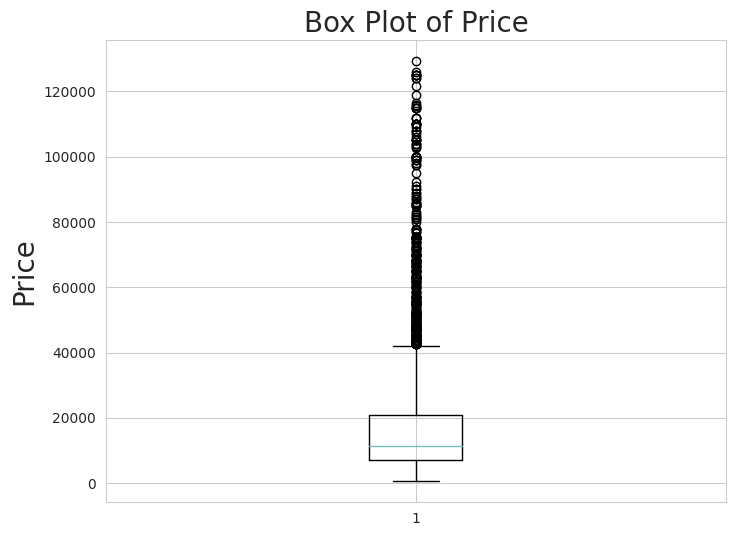

In [155]:
plt.figure(figsize=(8, 6))
plt.boxplot(df_no_mv['Price'])
plt.title('Box Plot of Price',fontsize=20)
plt.ylabel('Price',fontsize=20)
plt.show()

Mileage

<ipython-input-156-b88761e92d38>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  dn2 = sns.distplot(df_no_mv['Mileage'],color='blue')


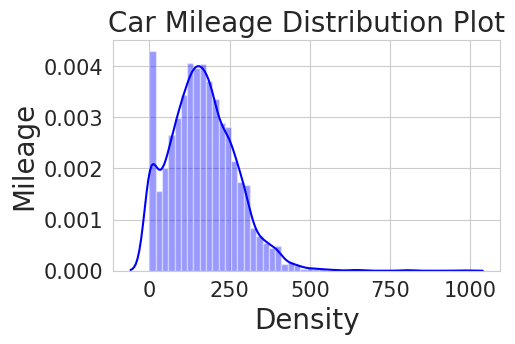

In [156]:
plt.figure(figsize=[5,3])
dn2 = sns.distplot(df_no_mv['Mileage'],color='blue')
# plt.title()
dn2.axes.set_title('Car Mileage Distribution Plot',fontsize=20)
dn2.set_xlabel("Density",fontsize=20)
dn2.set_ylabel("Mileage",fontsize=20)
dn2.tick_params(labelsize=15)

Box plot for mileage elps in understanding the spread of mileage among the vehicles

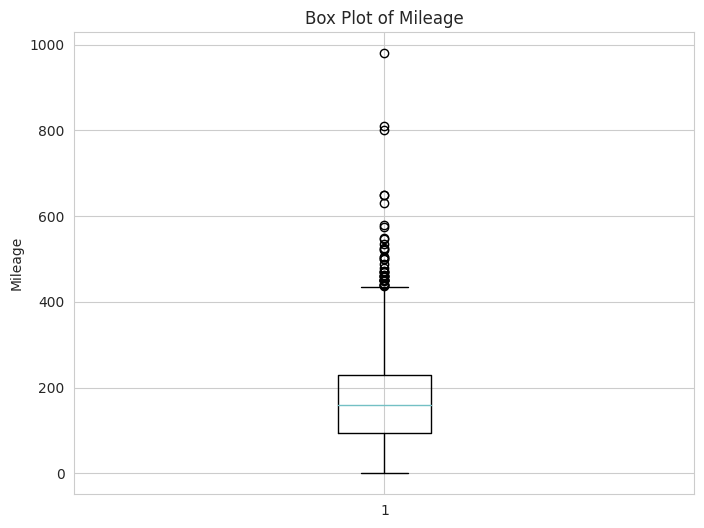

In [157]:
plt.figure(figsize=(8, 6))
plt.boxplot(df_no_mv['Mileage'])
plt.title('Box Plot of Mileage')
plt.ylabel('Mileage')
plt.show()

In [158]:
q = df_no_mv['Mileage'].quantile(0.99)

df_no_mv = df_no_mv[df_no_mv['Mileage']<q]

<ipython-input-159-e859535d3c0a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  dn3 = sns.distplot(df_no_mv['Mileage'],color='blue')


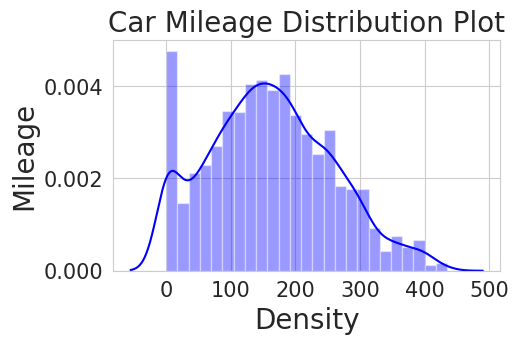

In [159]:
plt.figure(figsize=[5,3])
dn3 = sns.distplot(df_no_mv['Mileage'],color='blue')
dn3.axes.set_title('Car Mileage Distribution Plot',fontsize=20)
dn3.set_xlabel("Density",fontsize=20)
dn3.set_ylabel("Mileage",fontsize=20)
dn3.tick_params(labelsize=15)

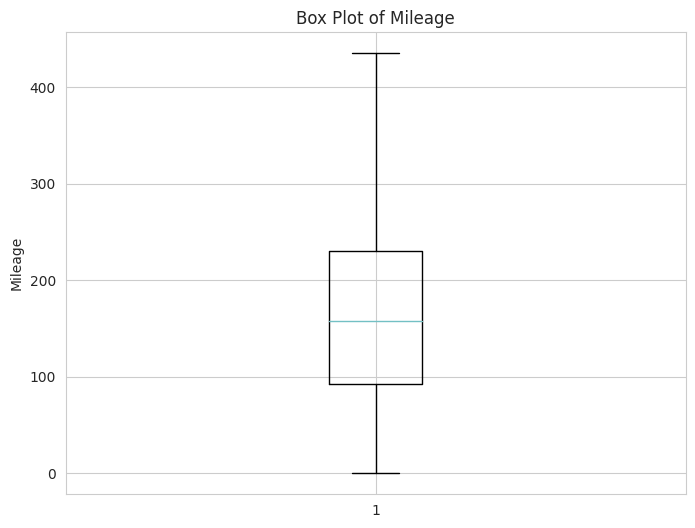

In [160]:
plt.figure(figsize=(8, 6))
plt.boxplot(df_no_mv['Mileage'])
plt.title('Box Plot of Mileage')
plt.ylabel('Mileage')
plt.show()

Enginev

<ipython-input-161-ddd030e6716d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  dn4 = sns.distplot(df_no_mv['EngineV'],color='blue')


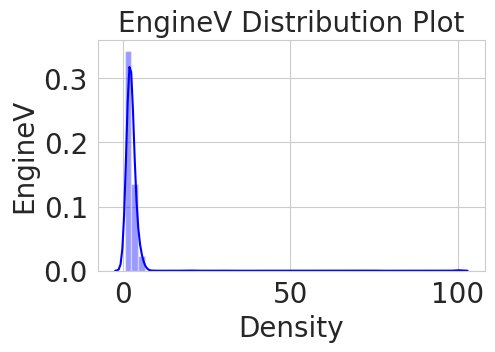

In [161]:
plt.figure(figsize=[5,3])
dn4 = sns.distplot(df_no_mv['EngineV'],color='blue')
# plt.title('')
dn4.axes.set_title('EngineV Distribution Plot',fontsize=20)
dn4.set_xlabel("Density",fontsize=20)
dn4.set_ylabel("EngineV",fontsize=20)
dn4.tick_params(labelsize=20)

Box plot for the engineV shows us the variability in engine size of different vehicles

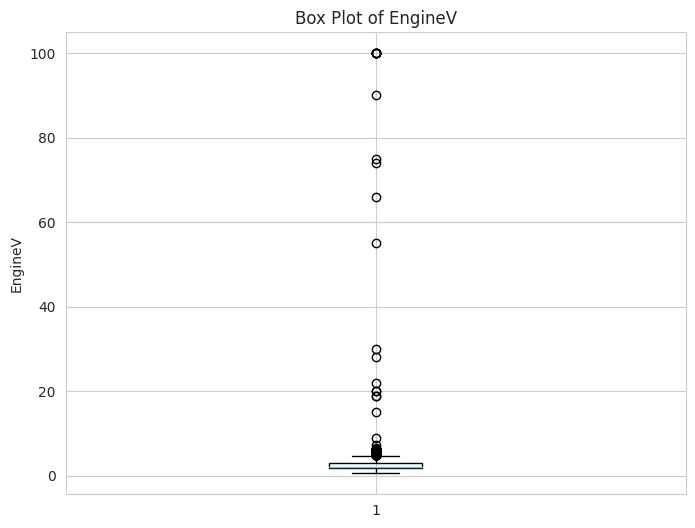

In [162]:
plt.figure(figsize=(8, 6))
plt.boxplot(df_no_mv['EngineV'])
plt.title('Box Plot of EngineV')
plt.ylabel('EngineV')
plt.show()

In [163]:
df_no_mv = df_no_mv[df_no_mv['EngineV']<6.5]

<ipython-input-164-aa60f018afa6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  dn5 = sns.distplot(df_no_mv['EngineV'],color='blue')


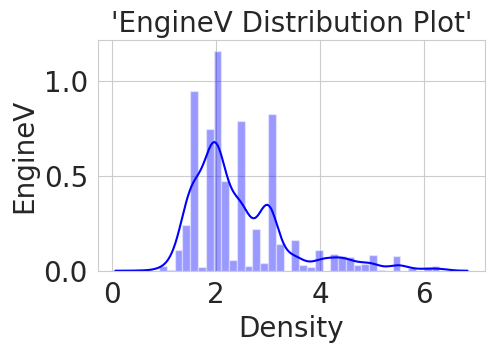

In [164]:
plt.figure(figsize=[5,3])
dn5 = sns.distplot(df_no_mv['EngineV'],color='blue')
dn5.axes.set_title("'EngineV Distribution Plot'",fontsize=20)
dn5.set_xlabel("Density",fontsize=20)
dn5.set_ylabel("EngineV",fontsize=20)
dn5.tick_params(labelsize=20)

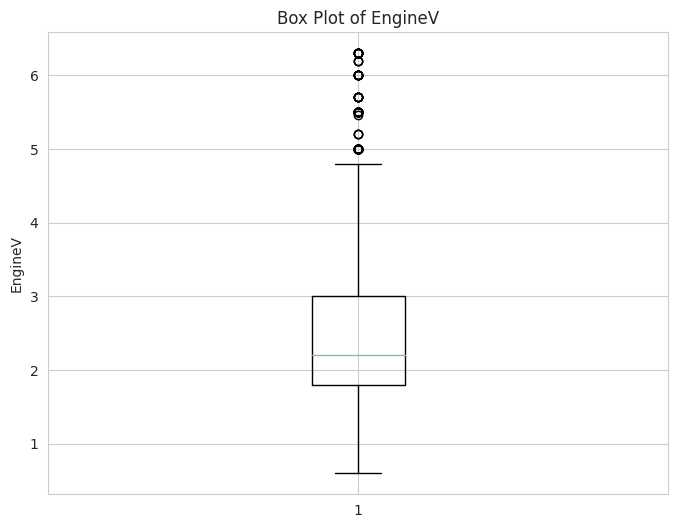

In [165]:
plt.figure(figsize=(8, 6))
plt.boxplot(df_no_mv['EngineV'])
plt.title('Box Plot of EngineV')
plt.ylabel('EngineV')
plt.show()

Year

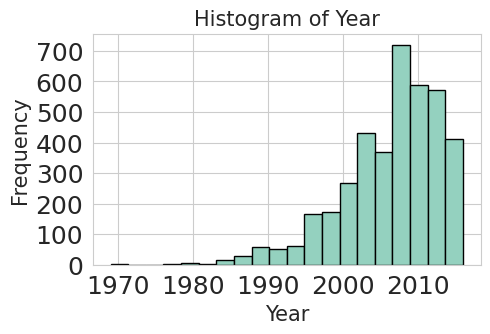

In [166]:
# Create a histogram for Year
plt.figure(figsize=(5,3))
plt.hist(df_no_mv['Year'], bins=20, edgecolor='k')
plt.title('Histogram of Year', fontsize=15)
plt.xlabel('Year',fontsize=15)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel('Frequency',fontsize=15)
plt.show()

Body

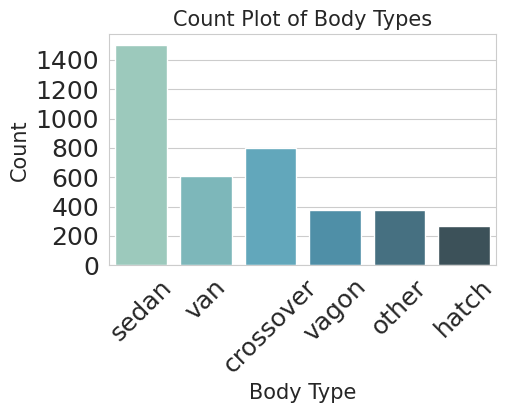

In [167]:
import seaborn as sns

# Create a count plot for Body
plt.figure(figsize=(5,3))
sns.countplot(data=df_no_mv, x='Body')
plt.title('Count Plot of Body Types',fontsize=15)
plt.xlabel('Body Type',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(rotation=45,fontsize=18)  # Rotate x-axis labels for better readability if needed
plt.yticks(fontsize=18)
plt.show()

Engine Type

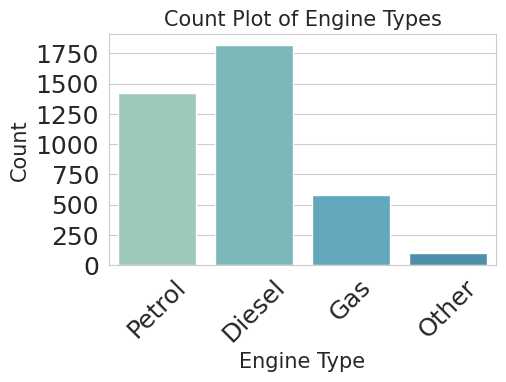

In [168]:
# Create a count plot for Engine Type
plt.figure(figsize=(5,3))
sns.countplot(data=df_no_mv, x='Engine Type')
plt.title('Count Plot of Engine Types',fontsize=15)
plt.xlabel('Engine Type',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(rotation=45,fontsize=18)  # Rotate x-axis labels for better readability if needed
plt.yticks(fontsize=18)
plt.show()

Model

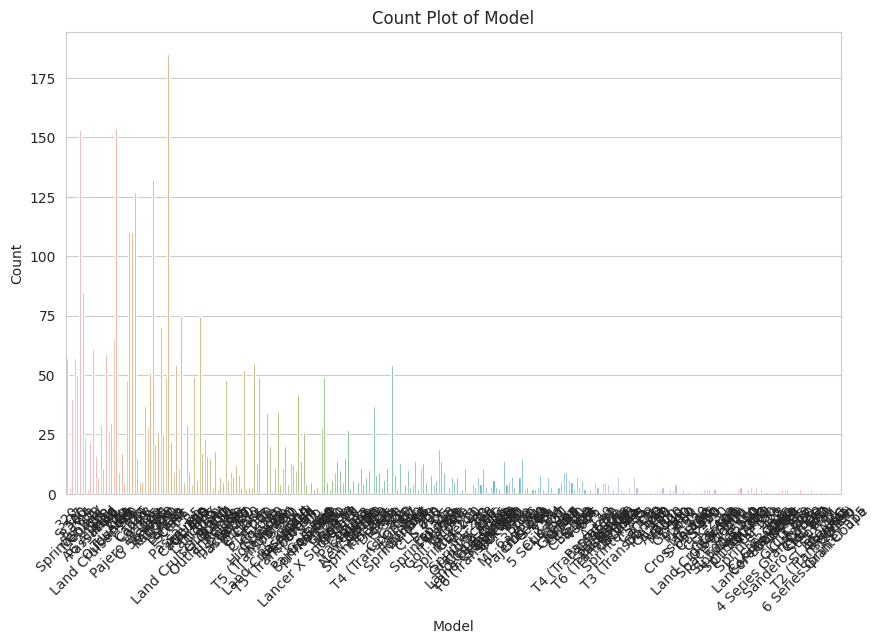

In [169]:
# Create a count plot for Model
plt.figure(figsize=(10, 6))
sns.countplot(data=df_no_mv, x='Model')
plt.title('Count Plot of Model')
plt.xlabel('Model')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()

In [170]:
cleaned_data = df_no_mv.reset_index(drop=True)

In [171]:
cleaned_data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991,320
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003,S 500
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007,Q7
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
3916,Toyota,17900.00,sedan,35,1.60,Petrol,yes,2014,Corolla
3917,Mercedes-Benz,125000.00,sedan,9,3.00,Diesel,yes,2014,S 350
3918,BMW,6500.00,sedan,1,3.50,Petrol,yes,1999,535
3919,BMW,8000.00,sedan,194,2.00,Petrol,yes,1985,520


In [172]:
cleaned_data=cleaned_data.drop(150)
cleaned_data = cleaned_data.reset_index(drop=True)

# Checking the linearity using a scatter plot

(array([-20000.,      0.,  20000.,  40000.,  60000.,  80000., 100000.,
        120000., 140000.]),
 [Text(0, -20000.0, '−20000'),
  Text(0, 0.0, '0'),
  Text(0, 20000.0, '20000'),
  Text(0, 40000.0, '40000'),
  Text(0, 60000.0, '60000'),
  Text(0, 80000.0, '80000'),
  Text(0, 100000.0, '100000'),
  Text(0, 120000.0, '120000'),
  Text(0, 140000.0, '140000')])

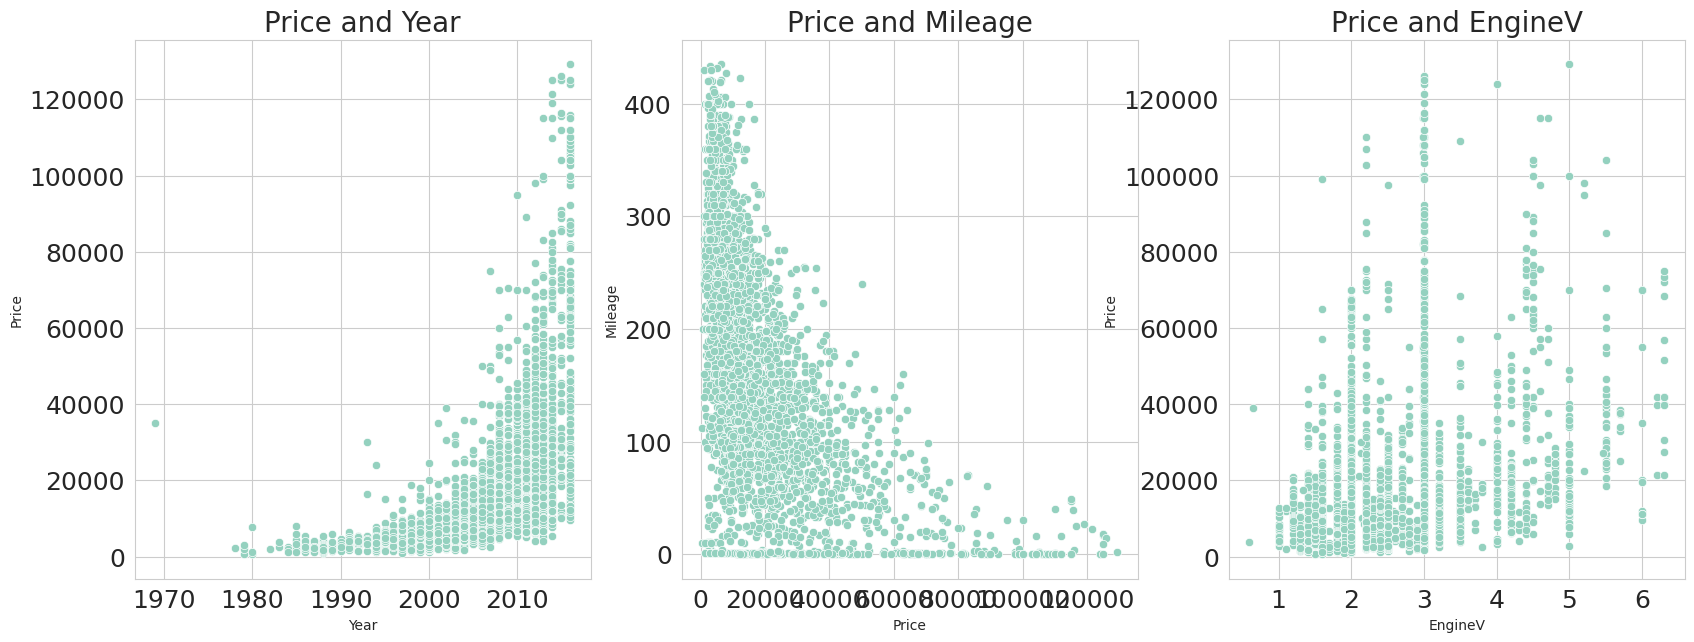

In [173]:
#Scatter Plot of independent variables vs dependent variables
plt.figure(figsize=[20,7])
plt.subplot(1,3,1)
plt.title("Price and Year", fontsize=20)
sns.scatterplot(x='Year',y='Price',data=cleaned_data)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.subplot(1,3,2)
plt.title("Price and Mileage", fontsize=20)
sns.scatterplot(x='Price',y='Mileage',data=cleaned_data)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.subplot(1,3,3)
sns.scatterplot(y='Price',x='EngineV',data=cleaned_data)
plt.title("Price and EngineV", fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

We can spot patterns but not perfect linear once.

<ipython-input-174-17bfed50433e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cleaned_data['Price'])


<Axes: xlabel='Price', ylabel='Density'>

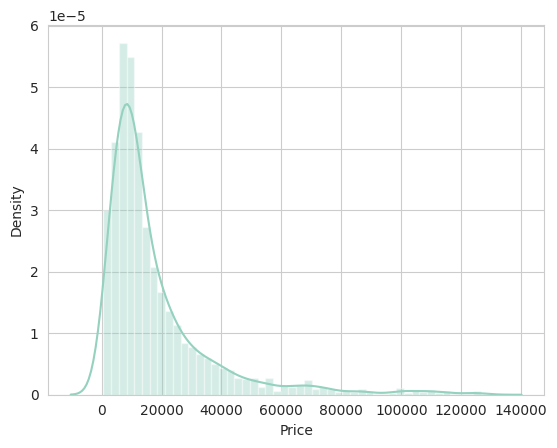

In [174]:
sns.distplot(cleaned_data['Price'])

# Transform 'Price' with a log transformation

In [175]:
log_price = np.log(cleaned_data['Price'])

cleaned_data['log_price'] = log_price
cleaned_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,log_price
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991,320,8.34
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999,Sprinter 212,8.97
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003,S 500,9.50
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007,Q7,10.04
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011,Rav 4,9.81


Text(0.5, 1.0, 'Log price and EngineV')

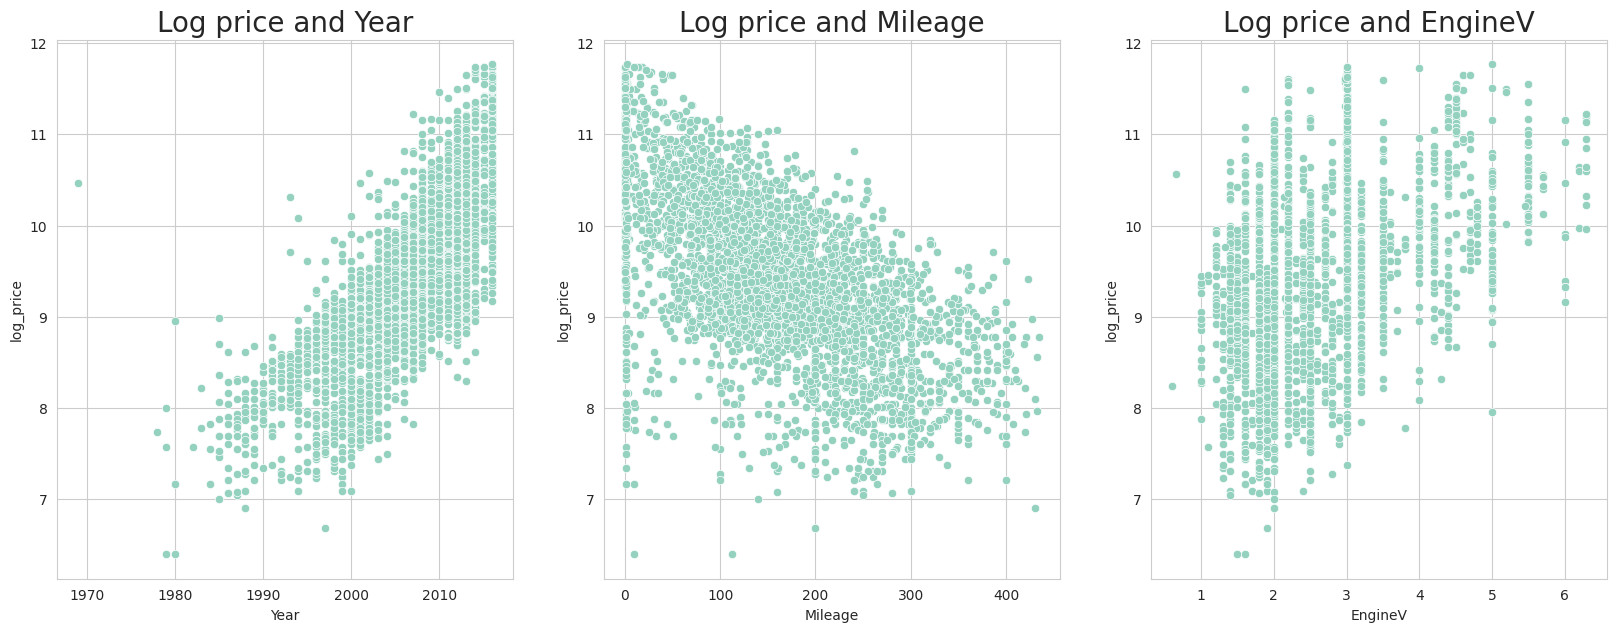

In [176]:

plt.figure(figsize=[20,7])
plt.subplot(1,3,1)
plt.title("Log price and Year", fontdict={'fontsize':20})
sns.scatterplot(x='Year',y='log_price',data=cleaned_data)

plt.subplot(1,3,2)
plt.title("Log price and Mileage", fontdict={'fontsize':20})
sns.scatterplot(y='log_price',x='Mileage',data=cleaned_data)

plt.subplot(1,3,3)
sns.scatterplot(y='log_price',x='EngineV',data=cleaned_data)
plt.title("Log price and EngineV", fontdict={'fontsize':20})

In [177]:
cleaned_data = cleaned_data.drop(['Price'],axis=1)

## **Feature Selection**

Feature selection simplified models, improves speed and prevent a series of unwanted issues arising from having many features

### Checking Multicollinearity Using VIF

In [178]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = cleaned_data[['Mileage','EngineV','Year']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,3.79,Mileage
1,7.67,EngineV
2,10.39,Year


In [179]:
cleaned_data= cleaned_data.drop('Year',axis=1)

In [180]:
from sklearn.preprocessing import LabelEncoder
temp_data = cleaned_data.copy()
for col in temp_data.columns:
    if temp_data[col].dtypes == 'object':
        encoder = LabelEncoder()
        temp_data[col] = encoder.fit_transform(temp_data[col])


print('\n--Correlated Features with target variable--\n')
print(abs(temp_data.corrwith(temp_data['log_price'])).sort_values(ascending=False)[1:])


--Correlated Features with target variable--

Mileage        0.60
Registration   0.44
EngineV        0.42
Body           0.38
Model          0.22
Brand          0.10
Engine Type    0.01
dtype: float64


In [181]:
temp_data.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Model,log_price
0,1,3,277,2.00,3,1,18,8.34
1,2,5,427,2.90,0,1,254,8.97
2,2,3,358,5.00,1,1,228,9.50
3,0,0,240,4.20,3,1,216,10.04
4,5,0,120,2.00,3,1,219,9.81


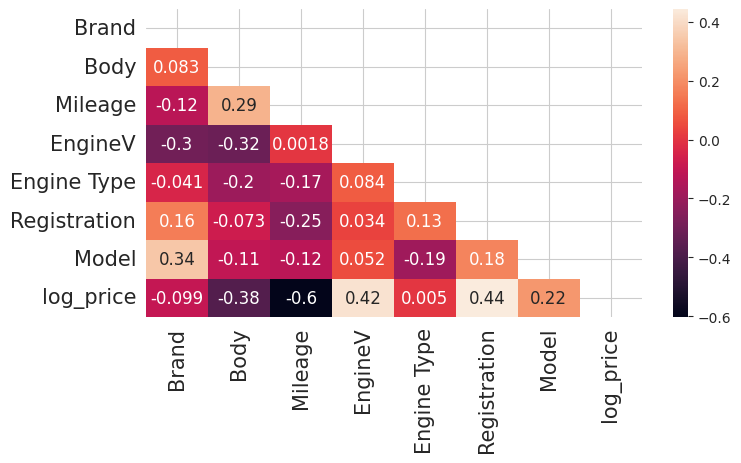

In [182]:
plt.figure(figsize=[8,4])
corr=temp_data.corr()
matrix=np.triu(corr)
annot_kws={'fontsize': 12}
dn6 = sns.heatmap(corr, annot=True  , mask=matrix , annot_kws=annot_kws)
# dn1.axes.set_title('Car Price Distribution Plot',fontsize=15)
# dn1.set_xlabel("Density",fontsize=20)
# dn1.set_ylabel("Price",fontsize=20)
dn6.tick_params(labelsize=15)

## **Feature Importance**

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards our Target variable.

In [183]:
# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
X = temp_data.drop('log_price',axis=1)
y = temp_data['log_price']
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

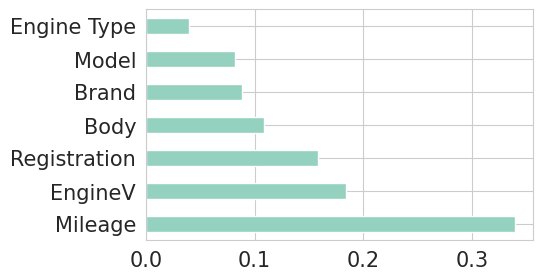

In [184]:
# plot graph of feature importances for better visualization
plt.figure(figsize=[5,3])
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
# dn1.axes.set_title('Car Price Distribution Plot',fontsize=15)
# dn1.set_xlabel("Density",fontsize=20)
# dn1.set_ylabel("Price",fontsize=20)
plt.tick_params(labelsize=15)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [185]:
print(feat_importances.sort_values(ascending=False))

Mileage        0.34
EngineV        0.18
Registration   0.16
Body           0.11
Brand          0.09
Model          0.08
Engine Type    0.04
dtype: float64


## **Categorical Features**

In [186]:
data_with_dummies = pd.get_dummies(cleaned_data,drop_first=True)

In [187]:
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,277,2.00,8.34,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,427,2.90,8.97,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,358,5.00,9.50,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,240,4.20,10.04,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,120,2.00,9.81,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


# Model Development

# Declaring dependent and independent variable

In [188]:
x = data_with_dummies.drop('log_price',axis=1)
y = data_with_dummies['log_price']

Feature Scaling

In [189]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x[['Mileage','EngineV']])

StandardScaler()

In [190]:
inputs_scaled = scaler.transform(x[['Mileage','EngineV']])
scaled_data = pd.DataFrame(inputs_scaled,columns=['Mileage','EngineV'])

In [191]:
input_scaled2 =scaled_data.join(x.drop(['Mileage','EngineV'],axis=1))

In [192]:
input_scaled2.head()

,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,1.20,-0.47,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.77,0.48,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.05,2.70,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.82,1.86,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.43,-0.47,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [193]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_scaled2,y,test_size=0.2, random_state=365)

# **Model Development**



Linear Regression with L2 regularization


In [194]:
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

from sklearn.linear_model import SGDRegressor

lasso_reg_l1=SGDRegressor(penalty='l2',max_iter=150,alpha=0.0001)
lasso_reg_l1.fit(x_train,y_train)

y_pred=lasso_reg_l1.predict(x_test)

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2_score:',metrics.r2_score(y_test,y_pred))

sgd_pred=y_pred

MAE: 0.33847544654857525
MSE: 0.25931544290213854
RMSE: 0.5092302454706894
R2_score: 0.6912766130337002


Scatter Plot

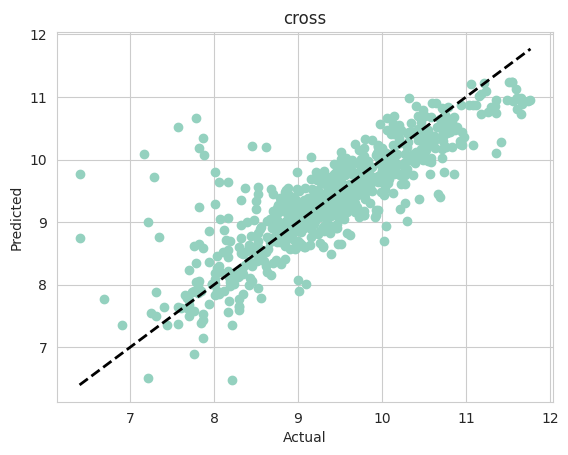

In [195]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('cross')
plt.show()

Line Graph

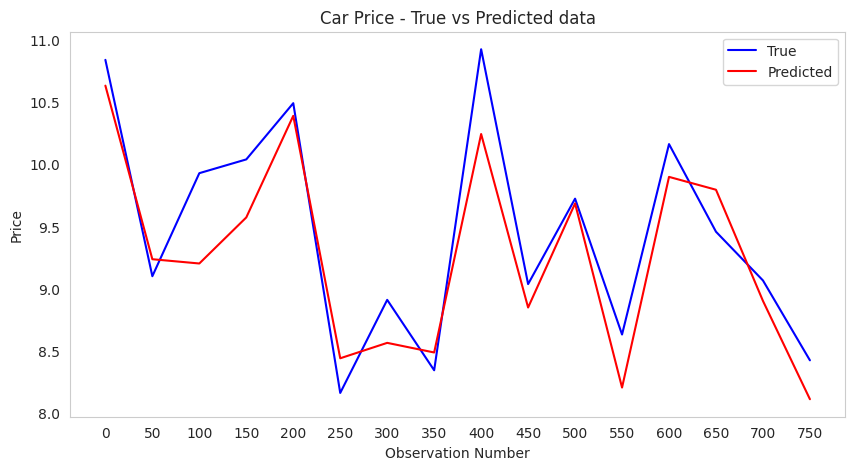

In [196]:
gap=50

train_seg=y_test[::gap]
pred_seg=y_pred[::gap]

x_ax =np.arange(len(train_seg))*gap

plt.figure(figsize=(10,5))
plt.plot(x_ax, train_seg, label="True" , color='blue')
plt.plot(x_ax, pred_seg, label="Predicted" , color='red')
plt.title("Car Price - True vs Predicted data")
plt.xlabel('Observation Number')
plt.ylabel('Price')
plt.xticks(x_ax)
plt.legend()
plt.grid()
plt.show()

In [197]:
# Error Graph

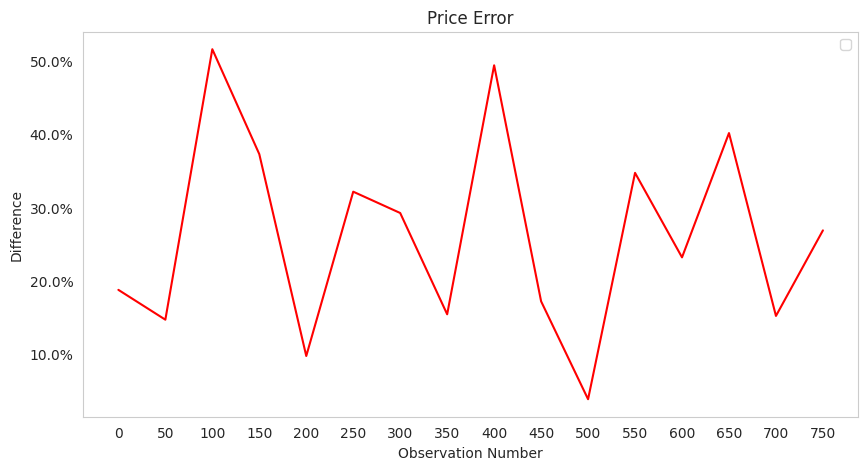

In [198]:
# To obtain the actual prices, we take the exponential of the log_price
df_ev = pd.DataFrame(np.exp(y_pred), columns=['Predicted Price'])

y_test = y_test.reset_index(drop=True)
df_ev['Actual Price'] = np.exp(y_test)

df_ev['Residual'] = df_ev['Actual Price'] - df_ev['Predicted Price']
df_ev['Difference%'] = np.absolute((df_ev['Residual']/df_ev['Actual Price'])*100)

pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_ev.sort_values(by=['Difference%'])

gap=50
x_ax =np.arange(len(train_seg))*gap
y_ax=df_ev['Difference%'][::gap]

import matplotlib.ticker as mtick
plt.figure(figsize=(10,5))
plt.plot(x_ax, y_ax , color='red')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(decimals=1))
plt.title("Price Error")
plt.xlabel('Observation Number')
plt.ylabel('Difference')
plt.xticks(x_ax)
plt.yticks()
plt.legend()
plt.grid()
plt.show()

Random Forest Regressor

In [199]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_scaled2,y,test_size=0.2, random_state=365)

In [200]:
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics

regressor = RandomForestRegressor(n_estimators=1500, random_state=42)

regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("r2_score",metrics.r2_score(y_test,y_pred))

rfr_pred=y_pred

MAE: 0.2719588612629696
MSE: 0.20572704447011908
RMSE: 0.4535714325992314
r2_score 0.7550753273751213


Scatter Plot

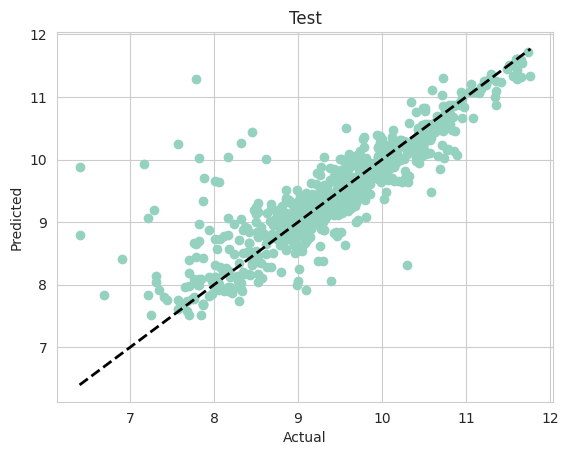

In [201]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test')
plt.show()

In [202]:
# Line Graph

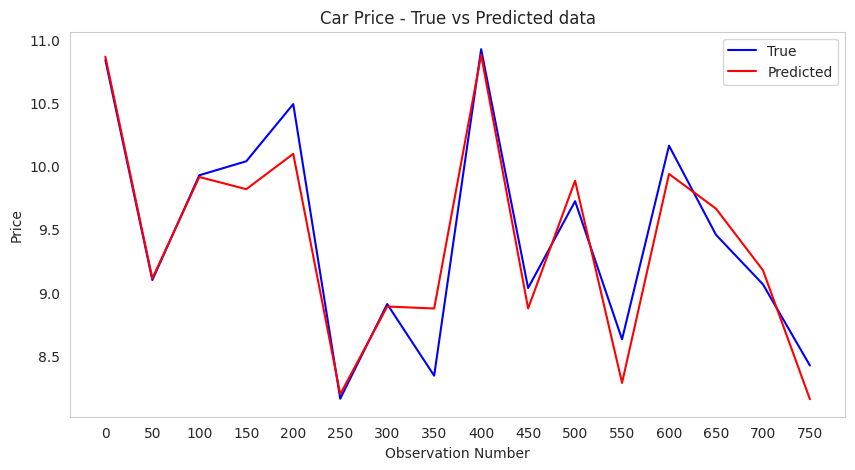

In [203]:
gap=50

train_seg=y_test[::gap]
pred_seg=y_pred[::gap]

x_ax =np.arange(len(train_seg))*gap
plt.figure(figsize=(10,5))
plt.plot(x_ax, train_seg, label="True" , color='blue')
plt.plot(x_ax, pred_seg, label="Predicted" , color='red')
plt.title("Car Price - True vs Predicted data")
plt.xlabel('Observation Number')
plt.ylabel('Price')
plt.xticks(x_ax)
plt.legend()
plt.grid()
plt.show()


Error Graph

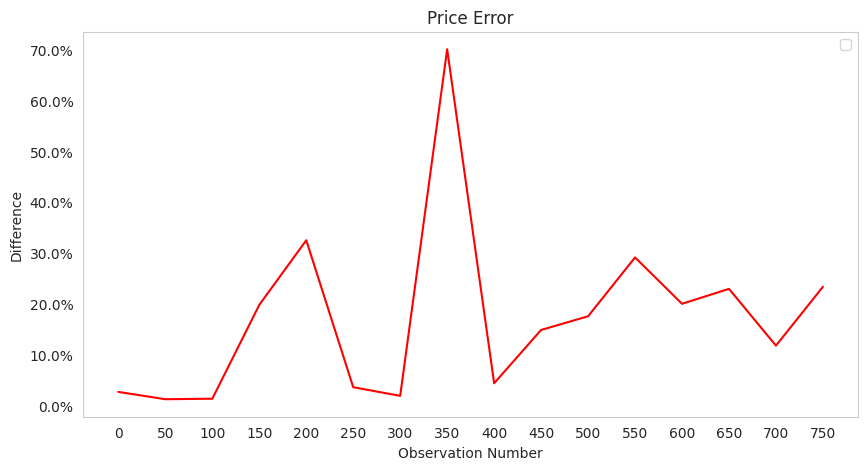

In [204]:
# To obtain the actual prices, we take the exponential of the log_price
df_ev = pd.DataFrame(np.exp(y_pred), columns=['Predicted Price'])

y_test = y_test.reset_index(drop=True)
df_ev['Actual Price'] = np.exp(y_test)

df_ev['Residual'] = df_ev['Actual Price'] - df_ev['Predicted Price']
df_ev['Difference%'] = np.absolute((df_ev['Residual']/df_ev['Actual Price'])*100)

pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_ev.sort_values(by=['Difference%'])

x_ax =np.arange(len(train_seg))*gap
y_ax=df_ev['Difference%'][::gap]

import matplotlib.ticker as mtick
plt.figure(figsize=(10,5))
plt.plot(x_ax, y_ax , color='red')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(decimals=1))
plt.title("Price Error")
plt.xlabel('Observation Number')
plt.ylabel('Difference')
plt.xticks(x_ax)
plt.yticks()
plt.legend()
plt.grid()
plt.show()

XGradient Boosting

In [205]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_scaled2,y,test_size=0.2, random_state=365)

In [206]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

xgboost_model = xgb.XGBRegressor()

# Define a parameter grid for hyperparameter tuning
# param_grid = {
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 4, 5],
#     'n_estimators': [100, 200, 300],
#     'subsample': [0.8, 0.9, 1.0],
#     'colsample_bytree': [0.8, 0.9, 1.0]
# }

# # Create a grid search object
# grid_search = GridSearchCV(estimator=xgboost_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)

# # Perform grid search to find the best hyperparameters
# grid_search.fit(x_train, y_train)

# # Get the best hyperparameters from the grid search
# best_params = grid_search.best_params_
# print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters on the full training set

ni=[100,200,300,500,1000]
for i in ni:
  best_xgboost_model = xgb.XGBRegressor(colsample_bytree= 0.9, learning_rate= 0.2, max_depth= 5, n_estimators=i, subsample= 0.9)

  from sklearn.model_selection import train_test_split

  x_train, x_test, y_train, y_test = train_test_split(input_scaled2,y,test_size=0.2, random_state=365)
  best_xgboost_model.fit(x_train, y_train)

  y_pred = best_xgboost_model.predict(x_test)

  print(i , metrics.mean_absolute_error(y_test, y_pred) , metrics.mean_squared_error(y_test, y_pred) , np.sqrt(metrics.mean_squared_error(y_test, y_pred)) , metrics.r2_score(y_test,y_pred))

# print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
# print('MSE:', metrics.mean_squared_error(y_test, y_pred))
# print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# print("r2_score",metrics.r2_score(y_test,y_pred))

# plt.scatter(y_test, y_pred)
# plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
# plt.xlabel('Actual')
# plt.ylabel('Predicted')
# plt.title('XGBoosting Regression')
# plt.show()

# gap=50

# train_seg=y_test[::gap]
# pred_seg=y_pred[::gap]

# number_of_observations=len(y_train)
# x_ax =np.arange(len(train_seg))*gap
# # print(x_ax)
# plt.figure(figsize=(10,5))
# plt.plot(x_ax, train_seg, label="True" , color='blue')
# plt.plot(x_ax, pred_seg, label="Predicted" , color='red')
# plt.title("Car Price - True vs Predicted data")
# plt.xlabel('Observation Number')
# plt.ylabel('Price')
# plt.xticks(x_ax)
# plt.legend()
# plt.grid()
# plt.show()

# xgb_pred=y_pred

100 0.2713898184946904 0.19311098430218332 0.4394439489880175 0.7700951533508754
200 0.261233748402326 0.186488764922697 0.43184344955399867 0.7779791188146694
300 0.25515513780790144 0.18227026644029 0.42693121980043813 0.7830013771299691
500 0.25373929893258707 0.17936326429969496 0.4235130036961025 0.7864622568088606
1000 0.2585728101569676 0.18350484489976313 0.4283746548288812 0.7815315717099038


In [207]:
# # To obtain the actual prices, we take the exponential of the log_price
# df_ev = pd.DataFrame(np.exp(y_pred), columns=['Predicted Price'])

# y_test = y_test.reset_index(drop=True)
# df_ev['Actual Price'] = np.exp(y_test)

# df_ev['Residual'] = df_ev['Actual Price'] - df_ev['Predicted Price']
# df_ev['Difference%'] = np.absolute((df_ev['Residual']/df_ev['Actual Price'])*100)

# pd.set_option('display.float_format', lambda x: '%.2f' % x)
# df_ev.sort_values(by=['Difference%'])

# df_ev

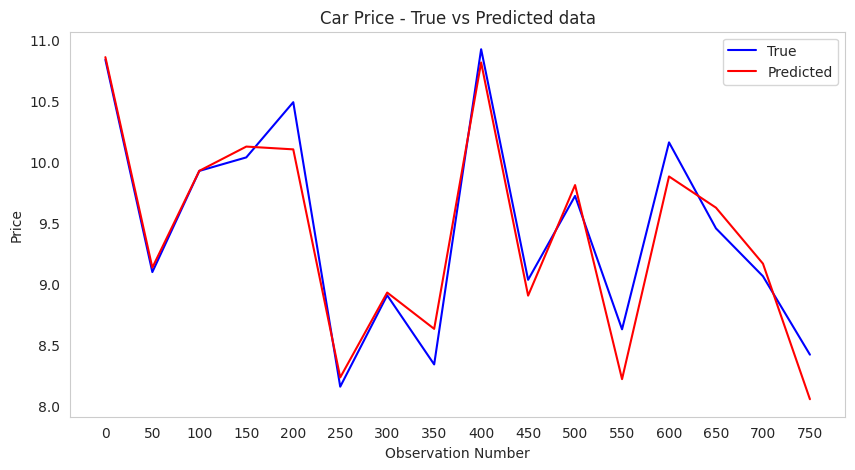

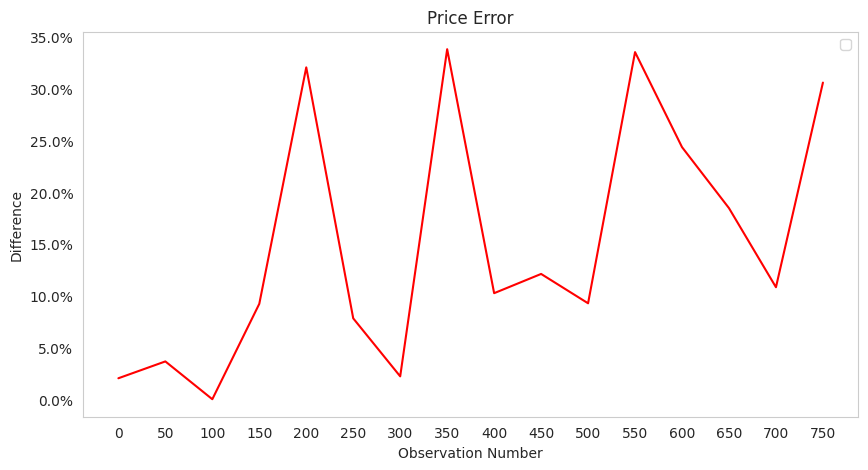

In [208]:
# final error xgb

best_xgboost_model = xgb.XGBRegressor(colsample_bytree= 0.9, learning_rate= 0.2, max_depth= 5, n_estimators=1000, subsample= 0.9)
x_train, x_test, y_train, y_test = train_test_split(input_scaled2,y,test_size=0.2, random_state=365)
best_xgboost_model.fit(x_train, y_train)

y_pred = best_xgboost_model.predict(x_test)


# To obtain the actual prices, we take the exponential of the log_price
df_ev = pd.DataFrame(np.exp(y_pred), columns=['Predicted Price'])

y_test = y_test.reset_index(drop=True)
df_ev['Actual Price'] = np.exp(y_test)

df_ev['Residual'] = df_ev['Actual Price'] - df_ev['Predicted Price']
df_ev['Difference%'] = np.absolute((df_ev['Residual']/df_ev['Actual Price'])*100)

pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_ev.sort_values(by=['Difference%'])

# df_ev.tail(5)
# print(max(df_ev['Difference%']))
gap=50

train_seg=y_test[::gap]
pred_seg=y_pred[::gap]

x_ax =np.arange(len(train_seg))*gap
plt.figure(figsize=(10,5))
plt.plot(x_ax, train_seg, label="True" , color='blue')
plt.plot(x_ax, pred_seg, label="Predicted" , color='red')
plt.title("Car Price - True vs Predicted data")
plt.xlabel('Observation Number')
plt.ylabel('Price')
plt.xticks(x_ax)
plt.legend()
plt.grid()
plt.show()







gap=50

x_ax =np.arange(len(train_seg))*gap
y_ax=df_ev['Difference%'][::gap]

import matplotlib.ticker as mtick
plt.figure(figsize=(10,5))
plt.plot(x_ax, y_ax , color='red')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(decimals=1))
# plt.plot(x_ax, pred_seg, label="Predicted" , color='red')
plt.title("Price Error")
plt.xlabel('Observation Number')
plt.ylabel('Difference')
plt.xticks(x_ax)
plt.yticks()
plt.legend()
plt.grid()
plt.show()

Gradient Boosting

In [209]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_scaled2,y,test_size=0.2, random_state=365)

In [210]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np

r2=0
n_estimators= [100, 200, 300, 500 , 1000]
# learning_rate= [0.01, 0.1, 0.2, 0.05]
# max_depth=[3, 4, 5, 6, 7, 8]
# min_samples_split= [2, 5, 10]
# min_samples_leaf=[1, 2, 4]

for n in n_estimators:
  regressor = GradientBoostingRegressor(random_state=42,n_estimators=n,learning_rate=0.2,max_depth=10,min_samples_split=7,min_samples_leaf=1)
  regressor.fit(x_train,y_train)
  y_pred=regressor.predict(x_test)
  print(n , metrics.mean_absolute_error(y_test, y_pred) , metrics.mean_squared_error(y_test, y_pred) , np.sqrt(metrics.mean_squared_error(y_test, y_pred)) , metrics.r2_score(y_test,y_pred))

# regressor = GradientBoostingRegressor(random_state=42,n_estimators=fn,learning_rate=flr,max_depth=fdepth,min_samples_split=fsplit,min_samples_leaf=fleaf)
# regressor.fit(x_train, y_train)

# y_pred = regressor.predict(x_test)

# print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
# print('MSE:', metrics.mean_squared_error(y_test, y_pred))
# print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# print("r2_score",metrics.r2_score(y_test,y_pred))

# plt.scatter(y_test, y_pred)
# plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
# plt.xlabel('Actual')
# plt.ylabel('Predicted')
# plt.title('Gradient Boosting Regression')
# plt.show()

# gap=50

# train_seg=y_test[::gap]
# pred_seg=y_pred[::gap]

# # number_of_observations=len(y_train)
# x_ax =np.arange(len(train_seg))*gap
# # print(x_ax)
# plt.figure(figsize=(10,5))
# plt.plot(x_ax, train_seg, label="True" , color='blue')
# plt.plot(x_ax, pred_seg, label="Predicted" , color='red')
# plt.title("Car Price - True vs Predicted data")
# plt.xlabel('Observation Number')
# plt.ylabel('Price')
# plt.xticks(x_ax)
# plt.legend()
# plt.grid()
# plt.show()

# gbt_pred=y_pred

100 0.2642959439961231 0.1892705967573665 0.4350524069090602 0.7746672584165444
200 0.26573829562849566 0.18900756589898363 0.4347500039091243 0.7749804051253089
300 0.2671428004393239 0.19054922328641122 0.4365194420485887 0.7731450123509268
500 0.27342458819634 0.19680952054600076 0.44363219061064624 0.7656919268278803
1000 0.2767296440240159 0.2007015094921833 0.4479972204067602 0.7610583886318758


In [211]:
# # To obtain the actual prices, we take the exponential of the log_price
# df_ev = pd.DataFrame(np.exp(y_pred), columns=['Predicted Price'])

# y_test = y_test.reset_index(drop=True)
# df_ev['Actual Price'] = np.exp(y_test)

# df_ev['Residual'] = df_ev['Actual Price'] - df_ev['Predicted Price']
# df_ev['Difference%'] = np.absolute((df_ev['Residual']/df_ev['Actual Price'])*100)

# pd.set_option('display.float_format', lambda x: '%.2f' % x)
# df_ev.sort_values(by=['Difference%'])

# df_ev

In [212]:
# # To obtain the actual prices, we take the exponential of the log_price
# df_ev = pd.DataFrame(np.exp(y_pred), columns=['Predicted Price'])

# y_test = y_test.reset_index(drop=True)
# df_ev['Actual Price'] = np.exp(y_test)

# df_ev['Residual'] = df_ev['Actual Price'] - df_ev['Predicted Price']
# df_ev['Difference%'] = np.absolute((df_ev['Residual']/df_ev['Actual Price'])*100)

# pd.set_option('display.float_format', lambda x: '%.2f' % x)
# df_ev.sort_values(by=['Difference%'])

# # df_ev.tail(5)
# # print(max(df_ev['Difference%']))

# x_ax =np.arange(len(train_seg))*gap
# y_ax=df_ev['Difference%'][::gap]

# import matplotlib.ticker as mtick
# plt.figure(figsize=(10,5))
# plt.plot(x_ax, y_ax , color='red')
# plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(decimals=1))
# # plt.plot(x_ax, pred_seg, label="Predicted" , color='red')
# plt.title("Price Error")
# plt.xlabel('Observation Number')
# plt.ylabel('Difference')
# plt.xticks(x_ax)
# plt.yticks()
# plt.legend()
# plt.grid()
# plt.show()

In [213]:
# print(fn , flr, fdepth , fsplit , fleaf)

In [214]:
# gap=50

# train_seg=y_test[::gap]
# pred1_seg=sgd_pred[::gap]
# pred2_seg=kfold_pred[::gap]
# pred3_seg=rfr_pred[::gap]
# pred4_seg=gbt_pred[::gap]
# pred5_seg=xgb_pred[::gap]

# # number_of_observations=len(y_train)
# x_ax =np.arange(len(train_seg))*gap
# # print(x_ax)
# plt.figure(figsize=(10,5))
# plt.plot(x_ax, train_seg, label="True" , color='red')
# plt.plot(x_ax, pred1_seg, label="SGD" , color='blue')
# plt.plot(x_ax, pred2_seg, label="K-fold" , color='green')
# plt.plot(x_ax, pred3_seg, label="RFR" , color='yellow')
# plt.plot(x_ax, pred4_seg, label="GBT" , color='orange')
# plt.plot(x_ax, pred5_seg, label="XGB" , color='purple')
# plt.title("Car Price - True vs Predicted data")
# plt.xlabel('Observation Number')
# plt.ylabel('Price')
# plt.xticks(x_ax)
# plt.legend()
# plt.grid()
# plt.show()

# # gbt_pred=y_pred

In [215]:
# # random forest

# from sklearn.model_selection import cross_val_predict
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error

# regressor = RandomForestRegressor(n_estimators=1000, random_state=42)

# predicted_values = cross_val_predict(regressor, x_train, y_train, cv=5)

# regressor.fit(x_train, y_train)

# y_pred = regressor.predict(x_test)

# # y_pred_train=regressor.predict(x_train)

# print('test model')
# print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
# print('MSE:', metrics.mean_squared_error(y_test, y_pred))
# print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# print("r2_score",metrics.r2_score(y_test,y_pred))


# # Plot the predicted values against the actual values for Random Forest
# plt.scatter(y_test, y_pred)
# plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
# plt.xlabel('Actual')
# plt.ylabel('Predicted')
# plt.title('Test')
# plt.show()

In [216]:
# gap=50

# train_seg=y_test[::gap]
# pred_seg=y_pred[::gap]

# # number_of_observations=len(y_train)
# x_ax =np.arange(len(train_seg))*gap
# # print(x_ax)
# plt.figure(figsize=(10,5))
# plt.plot(x_ax, train_seg, label="True" , color='blue')
# plt.plot(x_ax, pred_seg, label="Predicted" , color='red')
# plt.title("Car Price - True vs Predicted data")
# plt.xlabel('Observation Number')
# plt.ylabel('Price')
# plt.xticks(x_ax)
# plt.legend()
# plt.grid()
# plt.show()

In [217]:
# # To obtain the actual prices, we take the exponential of the log_price
# df_ev = pd.DataFrame(np.exp(y_pred), columns=['Predicted Price'])

# y_test = y_test.reset_index(drop=True)
# df_ev['Actual Price'] = np.exp(y_test)

# df_ev['Residual'] = df_ev['Actual Price'] - df_ev['Predicted Price']
# df_ev['Difference%'] = np.absolute((df_ev['Residual']/df_ev['Actual Price'])*100)

# pd.set_option('display.float_format', lambda x: '%.2f' % x)
# df_ev.sort_values(by=['Difference%'])

# # df_ev.tail(5)
# # print(max(df_ev['Difference%']))

# x_ax =np.arange(len(train_seg))*gap
# y_ax=df_ev['Difference%'][::gap]

# import matplotlib.ticker as mtick
# plt.figure(figsize=(10,5))
# plt.plot(x_ax, y_ax , color='red')
# plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(decimals=1))
# # plt.plot(x_ax, pred_seg, label="Predicted" , color='red')
# plt.title("Price Error")
# plt.xlabel('Observation Number')
# plt.ylabel('Difference')
# plt.xticks(x_ax)
# plt.yticks()
# plt.legend()
# plt.grid()
# plt.show()

In [218]:
ni=[100,200,300,400,500]
for i in ni:
  regressor = RandomForestRegressor(n_estimators=i, random_state=42)
  regressor.fit(x_train, y_train)
  y_pred = regressor.predict(x_test)
  print(n , metrics.mean_absolute_error(y_test, y_pred) , metrics.mean_squared_error(y_test, y_pred) , np.sqrt(metrics.mean_squared_error(y_test, y_pred)) , metrics.r2_score(y_test,y_pred))

# predicted_values = cross_val_predict(regressor, x_train, y_train, cv=5)


# y_pred = regressor.predict(x_test)

# # y_pred_train=regressor.predict(x_train)

# print('test model')
# print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
# print('MSE:', metrics.mean_squared_error(y_test, y_pred))
# print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# print("r2_score",metrics.r2_score(y_test,y_pred))

1000 0.27437825227741003 0.20720304006142334 0.455195606373154 0.7533181070838996
1000 0.2727921484558735 0.20640292072789979 0.4543158820995583 0.754270674921195
1000 0.2725117148723157 0.20602905274833686 0.45390423301434063 0.7547157767926346
1000 0.27240093430970524 0.2065988230155426 0.4545314323735407 0.7540374469380149
1000 0.27230304217767287 0.20683618982059107 0.45479246895764563 0.7537548541113486


In [219]:
# Linear Regression with L2 regularization

MAE: 0.33860114491449894
MSE: 0.26049807785470563
RMSE: 0.5103901231947044
R2_score: 0.6898686480316352


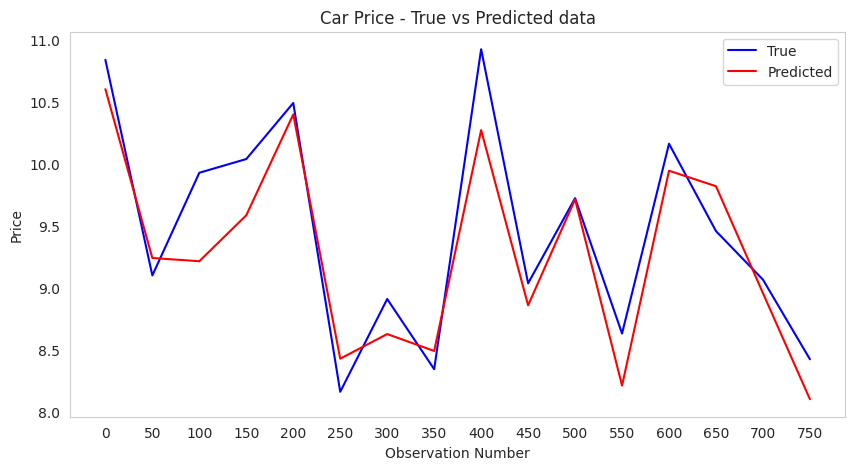

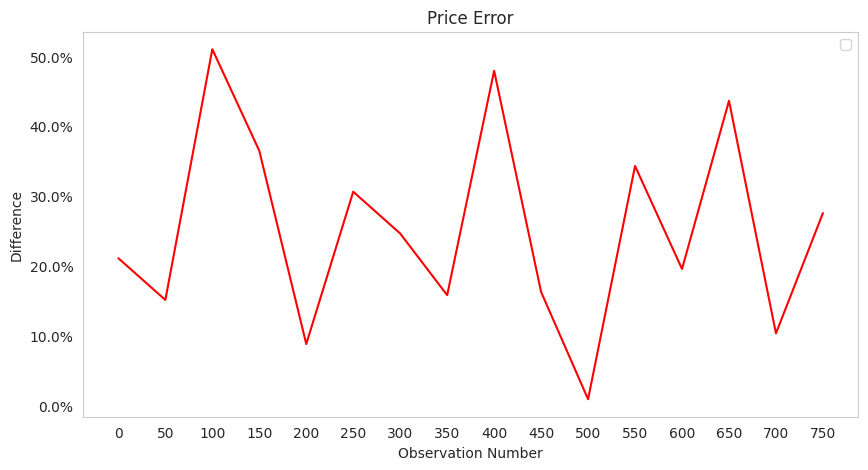

In [220]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_scaled2,y,test_size=0.2, random_state=365)

import numpy as np
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

from sklearn.linear_model import SGDRegressor

lasso_reg_l1=SGDRegressor(penalty='l2',max_iter=500,alpha=0.0001)
lasso_reg_l1.fit(x_train,y_train)

y_pred=lasso_reg_l1.predict(x_test)
sgd_pred=y_pred

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2_score:',metrics.r2_score(y_test,y_pred))

gap=50

train_seg=y_test[::gap]
pred_seg=y_pred[::gap]

# number_of_observations=len(y_train)
x_ax =np.arange(len(train_seg))*gap
# print(x_ax)
plt.figure(figsize=(10,5))
plt.plot(x_ax, train_seg, label="True" , color='blue')
plt.plot(x_ax, pred_seg, label="Predicted" , color='red')
plt.title("Car Price - True vs Predicted data")
plt.xlabel('Observation Number')
plt.ylabel('Price')
plt.xticks(x_ax)
plt.legend()
plt.grid()
plt.show()




# To obtain the actual prices, we take the exponential of the log_price
df_ev = pd.DataFrame(np.exp(y_pred), columns=['Predicted Price'])

y_test = y_test.reset_index(drop=True)
df_ev['Actual Price'] = np.exp(y_test)

df_ev['Residual'] = df_ev['Actual Price'] - df_ev['Predicted Price']
df_ev['Difference%'] = np.absolute((df_ev['Residual']/df_ev['Actual Price'])*100)

pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_ev.sort_values(by=['Difference%'])

# df_ev.tail(5)
# print(max(df_ev['Difference%']))

x_ax =np.arange(len(train_seg))*gap
y_ax=df_ev['Difference%'][::gap]

import matplotlib.ticker as mtick
plt.figure(figsize=(10,5))
plt.plot(x_ax, y_ax , color='red')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(decimals=1))
# plt.plot(x_ax, pred_seg, label="Predicted" , color='red')
plt.title("Price Error")
plt.xlabel('Observation Number')
plt.ylabel('Difference')
plt.xticks(x_ax)
plt.yticks()
plt.legend()
plt.grid()
plt.show()

MAE: 0.271801992803137
MSE: 0.20563177079670056
RMSE: 0.45346639434108077
R2_score: 0.755188753751959


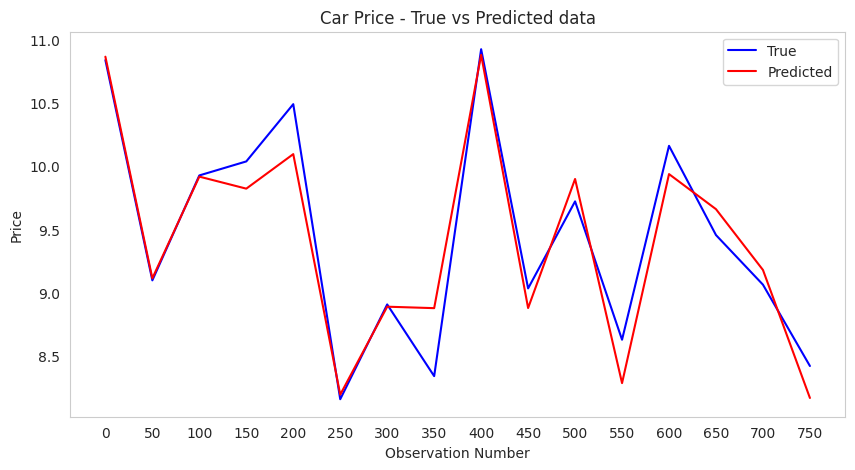

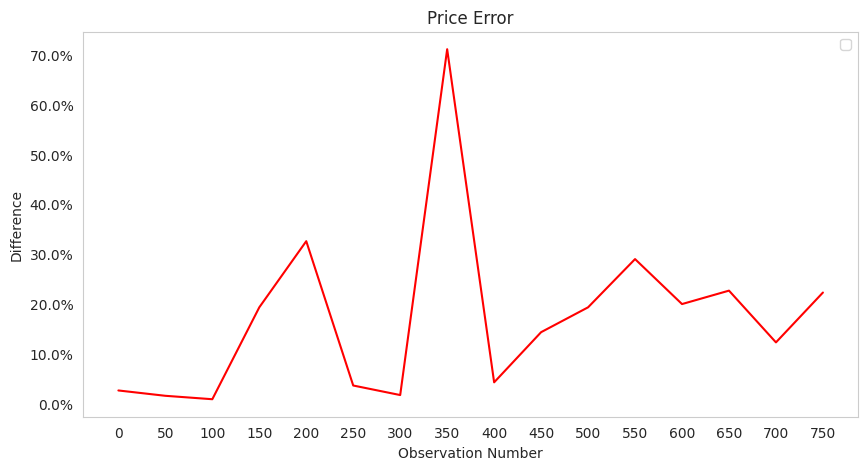

In [221]:
#  FINAL RFR
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_scaled2,y,test_size=0.2, random_state=365)

regressor = RandomForestRegressor(n_estimators=1000, random_state=42)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

rfr_pred=y_pred

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2_score:',metrics.r2_score(y_test,y_pred))

gap=50

train_seg=y_test[::gap]
pred_seg=y_pred[::gap]

# number_of_observations=len(y_train)
x_ax =np.arange(len(train_seg))*gap
# print(x_ax)
plt.figure(figsize=(10,5))
plt.plot(x_ax, train_seg, label="True" , color='blue')
plt.plot(x_ax, pred_seg, label="Predicted" , color='red')
plt.title("Car Price - True vs Predicted data")
plt.xlabel('Observation Number')
plt.ylabel('Price')
plt.xticks(x_ax)
plt.legend()
plt.grid()
plt.show()



# To obtain the actual prices, we take the exponential of the log_price
df_ev = pd.DataFrame(np.exp(y_pred), columns=['Predicted Price'])

y_test = y_test.reset_index(drop=True)
df_ev['Actual Price'] = np.exp(y_test)

df_ev['Residual'] = df_ev['Actual Price'] - df_ev['Predicted Price']
df_ev['Difference%'] = np.absolute((df_ev['Residual']/df_ev['Actual Price'])*100)

pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_ev.sort_values(by=['Difference%'])

# df_ev.tail(5)
# print(max(df_ev['Difference%']))

x_ax =np.arange(len(train_seg))*gap
y_ax=df_ev['Difference%'][::gap]

import matplotlib.ticker as mtick
plt.figure(figsize=(10,5))
plt.plot(x_ax, y_ax , color='red')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(decimals=1))
# plt.plot(x_ax, pred_seg, label="Predicted" , color='red')
plt.title("Price Error")
plt.xlabel('Observation Number')
plt.ylabel('Difference')
plt.xticks(x_ax)
plt.yticks()
plt.legend()
plt.grid()
plt.show()

MAE: 0.27342458819634
MSE: 0.19680952054600076
RMSE: 0.44363219061064624
R2_score: 0.7656919268278803


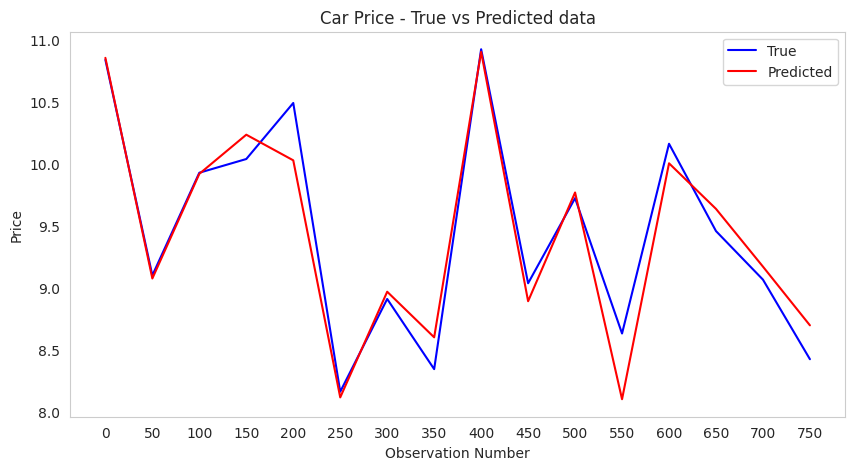

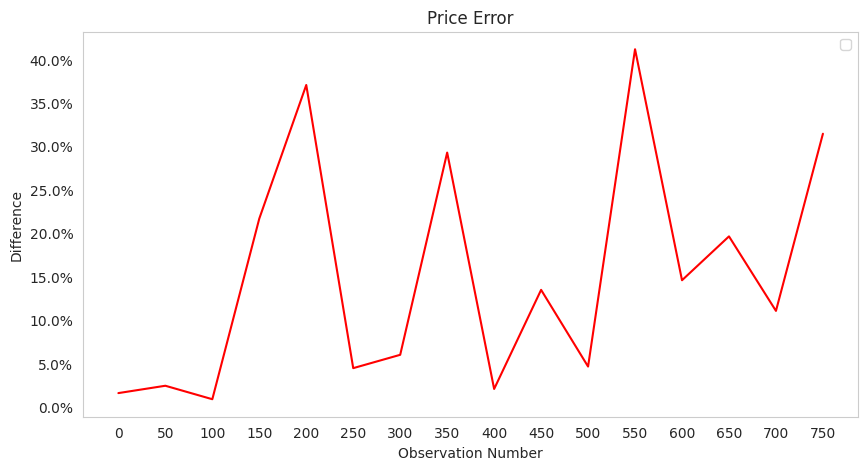

In [222]:
# FINAL GBT

regressor = GradientBoostingRegressor(random_state=42,n_estimators=500,learning_rate=0.2,max_depth=10,min_samples_split=7,min_samples_leaf=1)
regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)

gb_pred =y_pred

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2_score:',metrics.r2_score(y_test,y_pred))

gap=50

train_seg=y_test[::gap]
pred_seg=y_pred[::gap]

# number_of_observations=len(y_train)
x_ax =np.arange(len(train_seg))*gap
# print(x_ax)
plt.figure(figsize=(10,5))
plt.plot(x_ax, train_seg, label="True" , color='blue')
plt.plot(x_ax, pred_seg, label="Predicted" , color='red')
plt.title("Car Price - True vs Predicted data")
plt.xlabel('Observation Number')
plt.ylabel('Price')
plt.xticks(x_ax)
plt.legend()
plt.grid()
plt.show()



# To obtain the actual prices, we take the exponential of the log_price
df_ev = pd.DataFrame(np.exp(y_pred), columns=['Predicted Price'])

y_test = y_test.reset_index(drop=True)
df_ev['Actual Price'] = np.exp(y_test)

df_ev['Residual'] = df_ev['Actual Price'] - df_ev['Predicted Price']
df_ev['Difference%'] = np.absolute((df_ev['Residual']/df_ev['Actual Price'])*100)

pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_ev.sort_values(by=['Difference%'])

# df_ev.tail(5)
# print(max(df_ev['Difference%']))

x_ax =np.arange(len(train_seg))*gap
y_ax=df_ev['Difference%'][::gap]

import matplotlib.ticker as mtick
plt.figure(figsize=(10,5))
plt.plot(x_ax, y_ax , color='red')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(decimals=1))
# plt.plot(x_ax, pred_seg, label="Predicted" , color='red')
plt.title("Price Error")
plt.xlabel('Observation Number')
plt.ylabel('Difference')
plt.xticks(x_ax)
plt.yticks()
plt.legend()
plt.grid()
plt.show()

MAE: 0.25373929893258707
MSE: 0.17936326429969496
RMSE: 0.4235130036961025
R2_score: 0.7864622568088606


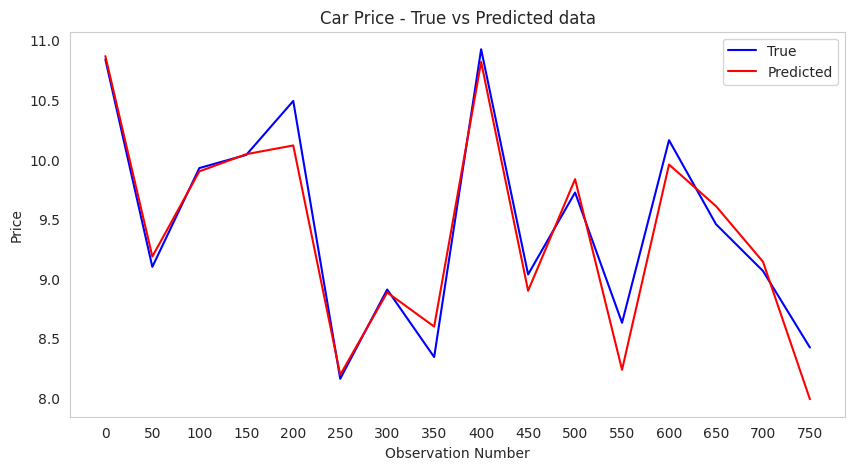

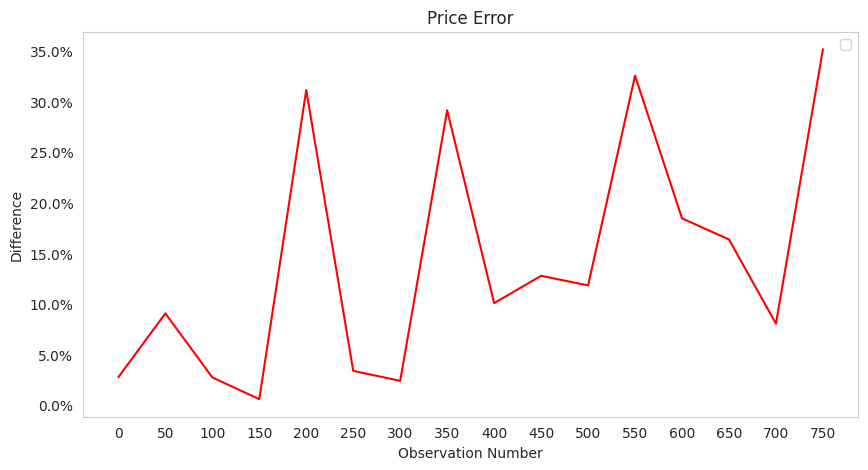

In [223]:
# FINAL XGB

best_xgboost_model = xgb.XGBRegressor(colsample_bytree= 0.9, learning_rate= 0.2, max_depth= 5, n_estimators=500, subsample= 0.9)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(input_scaled2,y,test_size=0.2, random_state=365)
best_xgboost_model.fit(x_train, y_train)

y_pred = best_xgboost_model.predict(x_test)

xgb_pred=y_pred

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2_score:',metrics.r2_score(y_test,y_pred))

gap=50

train_seg=y_test[::gap]
pred_seg=y_pred[::gap]

# number_of_observations=len(y_train)
x_ax =np.arange(len(train_seg))*gap
# print(x_ax)
plt.figure(figsize=(10,5))
plt.plot(x_ax, train_seg, label="True" , color='blue')
plt.plot(x_ax, pred_seg, label="Predicted" , color='red')
plt.title("Car Price - True vs Predicted data")
plt.xlabel('Observation Number')
plt.ylabel('Price')
plt.xticks(x_ax)
plt.legend()
plt.grid()
plt.show()



# To obtain the actual prices, we take the exponential of the log_price
df_ev = pd.DataFrame(np.exp(y_pred), columns=['Predicted Price'])

y_test = y_test.reset_index(drop=True)
df_ev['Actual Price'] = np.exp(y_test)

df_ev['Residual'] = df_ev['Actual Price'] - df_ev['Predicted Price']
df_ev['Difference%'] = np.absolute((df_ev['Residual']/df_ev['Actual Price'])*100)

pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_ev.sort_values(by=['Difference%'])

# df_ev.tail(5)
# print(max(df_ev['Difference%']))

x_ax =np.arange(len(train_seg))*gap
y_ax=df_ev['Difference%'][::gap]

import matplotlib.ticker as mtick
plt.figure(figsize=(10,5))
plt.plot(x_ax, y_ax , color='red')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(decimals=1))
# plt.plot(x_ax, pred_seg, label="Predicted" , color='red')
plt.title("Price Error")
plt.xlabel('Observation Number')
plt.ylabel('Difference')
plt.xticks(x_ax)
plt.yticks()
plt.legend()
plt.grid()
plt.show()

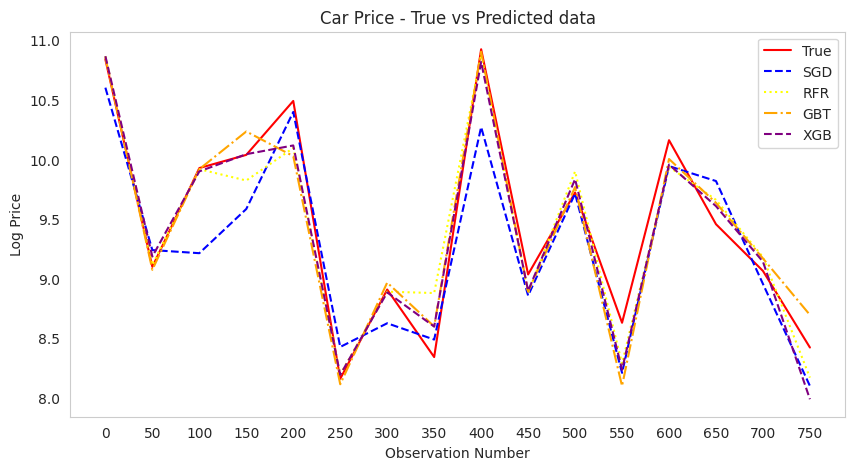

In [224]:
gap=50

train_seg=y_test[::gap]
pred1_seg=sgd_pred[::gap]
pred3_seg=rfr_pred[::gap]
pred4_seg=gb_pred[::gap]
pred5_seg=xgb_pred[::gap]

# number_of_observations=len(y_train)
x_ax =np.arange(len(train_seg))*gap
# print(x_ax)
plt.figure(figsize=(10,5))
plt.plot(x_ax, train_seg, label="True" , color='red' ,linestyle='solid')
plt.plot(x_ax, pred1_seg, label="SGD" , color='blue' , linestyle='dashed')
plt.plot(x_ax, pred3_seg, label="RFR" , color='yellow' , linestyle='dotted')
plt.plot(x_ax, pred4_seg, label="GBT" , color='orange' , linestyle='dashdot')
plt.plot(x_ax, pred5_seg, label="XGB" , color='purple' ,linestyle='dashed')
plt.title("Car Price - True vs Predicted data")
plt.xlabel('Observation Number')
plt.ylabel('Log Price')
plt.xticks(x_ax)
plt.legend()
plt.grid()
plt.show()

# gbt_pred=y_pred